In [2]:
import cv2 # !pip install opencv-python
import matplotlib.pyplot as plt

In [3]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'

In [4]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [8]:
classLabels=[]
file_name='Labels.txt'
with open(file_name,'rt') as fpt:
 classLabels=fpt.read().rstrip('\n').split('\n')

In [9]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [10]:
print(len(classLabels))

80


In [23]:
model.setInputSize((320, 320))  # Set to the expected input size of the model
model.setInputScale(1.0 / 255)  # Normalize pixel values if needed
model.setInputSwapRB(True)  # Swap red and blue channels if the model expects RGB instead of BGR

< cv2.dnn.Model 0000027A1CD5BED0>

In [30]:
img=cv2.imread('car2.jpg')

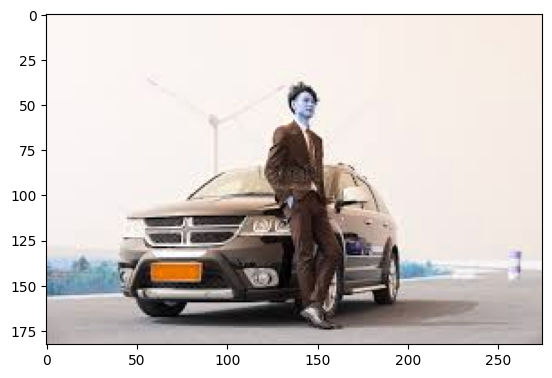

In [31]:
plt.imshow(img)

In [32]:
ClassIndex,confidece,bbox=model.detect(img,confThreshold=0.5)

In [33]:
print(ClassIndex)

[3 1]


In [36]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip (ClassIndex.flatten(),confidece.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[classInd-1],boxes[1]+40,font,fontScale=font_scale,color=(0,255,0),thickness=3)


error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'putText'
> Overload resolution failed:
>  - Can't parse 'org'. Input argument doesn't provide sequence protocol
>  - Can't parse 'org'. Input argument doesn't provide sequence protocol


In [38]:
# Assuming 'boxes' is a tuple or list of coordinates (x, y, width, height)
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2)  # Draw rectangle
    # Set the position for the text (at the top-left corner of the bounding box)
    org = (boxes[0], boxes[1] + 40)  # Adjust Y coordinate if needed
    cv2.putText(img, classLabels[ClassInd - 1], org, font, fontScale=font_scale, color=(0, 255, 0), thickness=3)


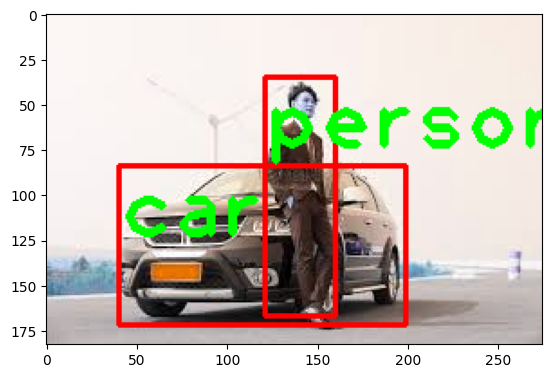

In [39]:
plt.imshow(img)

In [52]:
cap=cv2.VideoCapture('C:\HOPEAI\AICourse\Projects\Practice7\car_person.mp4')
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Could not open video")

font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
while True:
    ret,frame=cap.read()
    ClassIndex,confidece,bbox=model.detect(frame,confThreshold=0.5)
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd,conf,boxes in zip (ClassIndex.flatten(),confidece.flatten(),bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame, classLabels[ClassInd - 1], (boxes[0]+10,boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

    cv2.imshow('Obejct Detection',frame)
    if cv2.waitKey(2) & 0xFF==ord('q'):
       break
cap.release()
cv2.destroyAllWindows()
     

<>:1: SyntaxWarning: invalid escape sequence '\H'
<>:1: SyntaxWarning: invalid escape sequence '\H'
C:\Users\Prabhu\AppData\Local\Temp\ipykernel_11676\2824968089.py:1: SyntaxWarning: invalid escape sequence '\H'
  cap=cv2.VideoCapture('C:\HOPEAI\AICourse\Projects\Practice7\car_person.mp4')


[28  1  1  1  1  1  1  1  1  1  1  1 28 28  1 28 10]
[28  1  1  1  1 28  1 28  1  1  1]
[28  1  1  1 28  1  1 28 28  1  1  1  1  1]
[ 1 28  1  1  1  1  1 28  1 28 28  1 31]
[28  1  1  1  1  1  1 31  1]
[28  1  1  1  1  1  1 31  1 10]
[28  1  1  1  1  1  1  1  1 31 28 10]
[28  1  1  1  1  1 28  1  1  1  1 10 31]
[28  1  1  1  1  1  1 31  1  1 28 10]
[28  1  1 31  1  1  1 28  1 28  1  1 10]
[28  1  1  1  1  1 28 31  1  1 28  1  1  1]
[28  1  1  1 31  1  1 28  1]
[28  1  1  1  1  1  1  1 28  1 10]
[28  1  1  1  1  1  1  1  1  1  1 10 28]
[28  1  1  1  1  1  1  1 28  1  1 28 10]
[28  1 28  1  1  1  1  1  1]
[ 1  1  1 28  1  1  1 28  1  1  1  1 10]
[ 1  1 28  1  1  1  1 28  1 28  1]
[ 1  1  1  1 28  1  1  1 28 10  1]
[ 1  1  1  1  1  1  1 28  1 28 10  1 28]
[ 1  1  1  1  1  1 28 28  1  1  1 28]
[ 1  1  1 28  1  1  1  1 31  1 28  1 28]
[ 1  1  1 28  1  1  1  1  1 28 28]
[ 1  1  1  1  1  1 28 28  1  1  1  1]
[ 1  1  1 28  1  1  1  1 28  1  2  1]
[ 1  1 28  1  1  1  1  1  1  1 28 28 10]
[ 1  1

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
